In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

df = pd.read_csv('KO.csv')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050381,0.051752,0.050381,0.050381,806400,0.0,0.0
1,1962-01-03,0.049632,0.049632,0.048510,0.049258,1574400,0.0,0.0
2,1962-01-04,0.049383,0.050006,0.049383,0.049632,844800,0.0,0.0
3,1962-01-05,0.049632,0.050256,0.048385,0.048510,1420800,0.0,0.0
4,1962-01-08,0.048136,0.048136,0.047076,0.048011,2035200,0.0,0.0
...,...,...,...,...,...,...,...,...
15231,2022-07-06,63.599998,64.089996,63.189999,63.410000,13450500,0.0,0.0
15232,2022-07-07,63.259998,63.580002,62.700001,62.910000,14828400,0.0,0.0
15233,2022-07-08,63.029999,63.419998,62.880001,63.139999,11308900,0.0,0.0
15234,2022-07-11,62.990002,63.459999,62.590000,62.939999,12702100,0.0,0.0


In [2]:
noVolume = df.drop("Volume", axis=1)

In [3]:
#Dataset info
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15236 entries, 0 to 15235
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15236 non-null  object 
 1   Open          15236 non-null  float64
 2   High          15236 non-null  float64
 3   Low           15236 non-null  float64
 4   Close         15236 non-null  float64
 5   Volume        15236 non-null  int64  
 6   Dividends     15236 non-null  float64
 7   Stock Splits  15236 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 952.4+ KB


In [4]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [5]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,15236.000000,15236.000000,15236.000000,15236.000000,1.523600e+04,15236.000000,15236.000000
mean,11.658086,11.750886,11.564159,11.661078,9.118472e+06,0.001657,0.001116
std,14.775260,14.881195,14.668572,14.777277,7.966681e+06,0.021057,0.049268
min,0.037424,0.037551,0.035144,0.037298,7.680000e+04,0.000000,0.000000
25%,0.239607,0.241615,0.237431,0.239623,2.866050e+06,0.000000,0.000000
50%,4.914813,4.957846,4.863504,4.915897,7.676700e+06,0.000000,0.000000
75%,17.324689,17.543921,17.113819,17.345121,1.302580e+07,0.000000,0.000000
max,66.519405,66.717967,65.248586,65.735069,1.241690e+08,0.440000,3.000000


In [6]:
df.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999956,0.999945,0.999910,0.460629,0.096278,-0.008852
High,0.999956,1.000000,0.999925,0.999954,0.461891,0.095903,-0.008920
Low,0.999945,0.999925,1.000000,0.999955,0.458730,0.095829,-0.008911
Close,0.999910,0.999954,0.999955,1.000000,0.460215,0.095725,-0.008882
Volume,0.460629,0.461891,0.458730,0.460215,1.000000,0.058969,-0.000375
Dividends,0.096278,0.095903,0.095829,0.095725,0.058969,1.000000,-0.001783
Stock Splits,-0.008852,-0.008920,-0.008911,-0.008882,-0.000375,-0.001783,1.000000


In [7]:
#Duplicate value
df.duplicated().sum()

0

<AxesSubplot:>

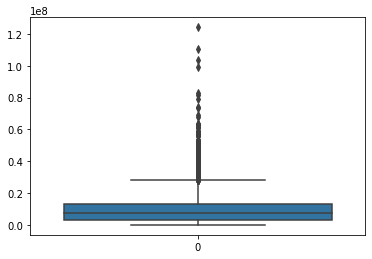

In [16]:
sns.boxplot(data=df.Volume)

In [10]:
df_norm = (df-df.min())/ (df.max() - df.min())
df_norm

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [11]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

In [12]:
#Ploting the boxplot of each variable
box_and_whisker(df_norm, 'Open')
print(f"Viariable 'Open' has {count_outliers(df_norm,'Open')} outliers")
box_and_whisker(df_norm, 'High')
print(f"Variable 'High' has {count_outliers(df_norm, 'High')} outliers")
box_and_whisker(df_norm, 'Low')
print(f"Variable 'Low' has {count_outliers(df_norm, 'Low')} outliers")
box_and_whisker(df_norm, 'Close')
print(f"Variable 'Close' has {count_outliers(df_norm,'Close')} outliers")
box_and_whisker(df_norm, 'Volume')
print(f"Variable 'Volume' has {count_outliers(df_norm, 'Volume')} outliers")

NameError: name 'df_norm' is not defined

In [13]:
#Remove the outliers
print(f"rows before removing: {df_norm.shape[0]}")
df1 = remove_outliers(df_norm, 'Open')
df1 = remove_outliers(df_norm, 'High')
df1 = remove_outliers(df_norm, 'Low')
df1 = remove_outliers(df_norm, 'Close')
df1 = remove_outliers(df_norm, 'Volume')
print(f"rows after removing: {df1.shape[0]}")

#Show plot
box_and_whisker(df1, 'Open')
print(f"Variable 'Open' has {count_outliers(df1,'Open')} outliers")
box_and_whisker(df1, 'High')
print(f"Variable 'High' has {count_outliers(df1,'High')} outliers")
box_and_whisker(df1, 'Low')
print(f"Variable 'Low' has {count_outliers(df1,'Low')} outliers")
box_and_whisker(df1, 'Close')
print(f"Variable 'Close' has {count_outliers(df1,'Close')} outliers")
box_and_whisker(df1, 'Volume')
print(f"Variable 'Volume' has {count_outliers(df1,'Volume')} outliers")

NameError: name 'df_norm' is not defined

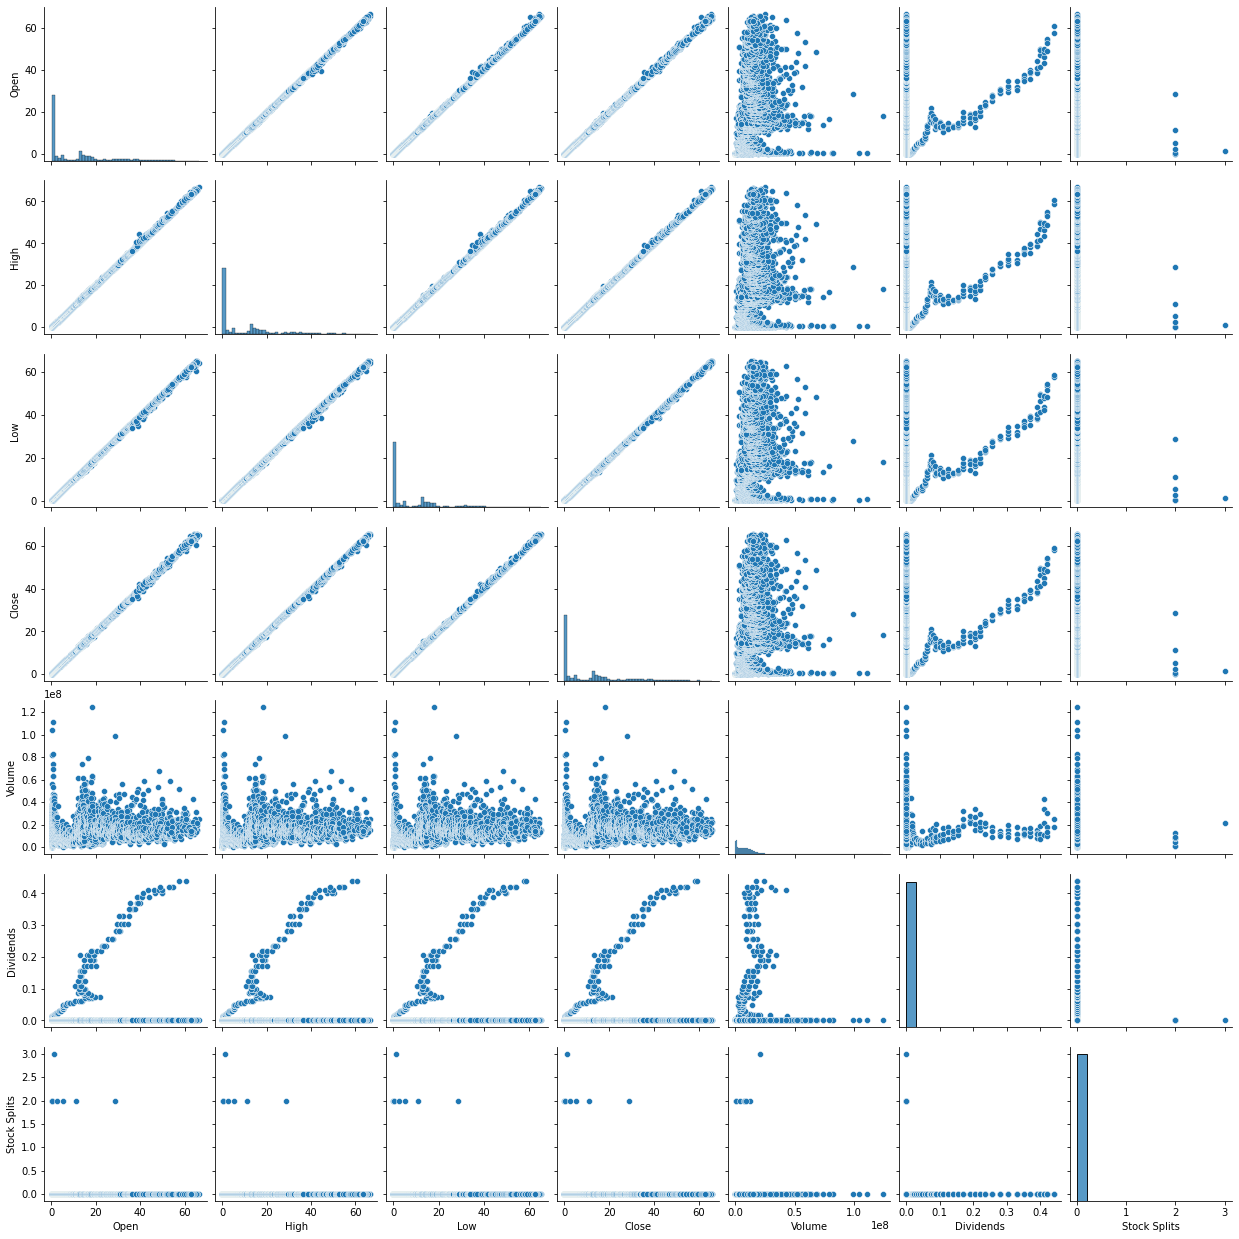

In [14]:
sns.pairplot(df)

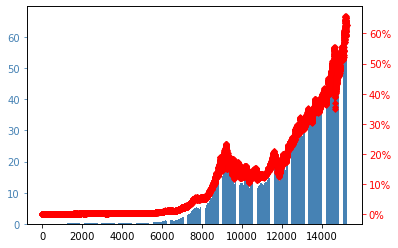

In [15]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df.index, df['Open'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df.index, df['Close'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

In [167]:
df.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999957,0.999955,0.999918,0.562722,0.094115,-0.005143
High,0.999957,1.000000,0.999939,0.999963,0.563529,0.093945,-0.005245
Low,0.999955,0.999939,1.000000,0.999958,0.562011,0.094191,-0.005240
Close,0.999918,0.999963,0.999958,1.000000,0.562829,0.094135,-0.005191
Volume,0.562722,0.563529,0.562011,0.562829,1.000000,0.063567,0.004329
Dividends,0.094115,0.093945,0.094191,0.094135,0.063567,1.000000,-0.001838
Stock Splits,-0.005143,-0.005245,-0.005240,-0.005191,0.004329,-0.001838,1.000000


In [168]:
import datetime
from dateutil.parser import parse
print('\t\tStart Date\t\tEnd Date')
print('KO\t\t{}\t\t{}'.format(df['Date'][0], df.iloc[-1, 0]))

df['Date'] = df.Date.apply(parse)


		Start Date		End Date
KO		1962-01-02		2018-05-16


In [169]:
def visualize_faang_stock_prices(df):

    fig, axes = plt.subplots(1,1,figsize = (30, 30))
    

    axes.set_facecolor('black')
    axes.plot(df['Date'], df['Close'])
    axes.set_title("Coca-cola's Stock Price", fontsize = 30)
    axes.set_xlabel('Time', fontsize = 25)
    axes.set_ylabel('Closing Price', fontsize = 25)
    axes.xaxis.set_tick_params(labelsize = 18)
    axes.yaxis.set_tick_params(labelsize = 18)
    
    plt.show()
    

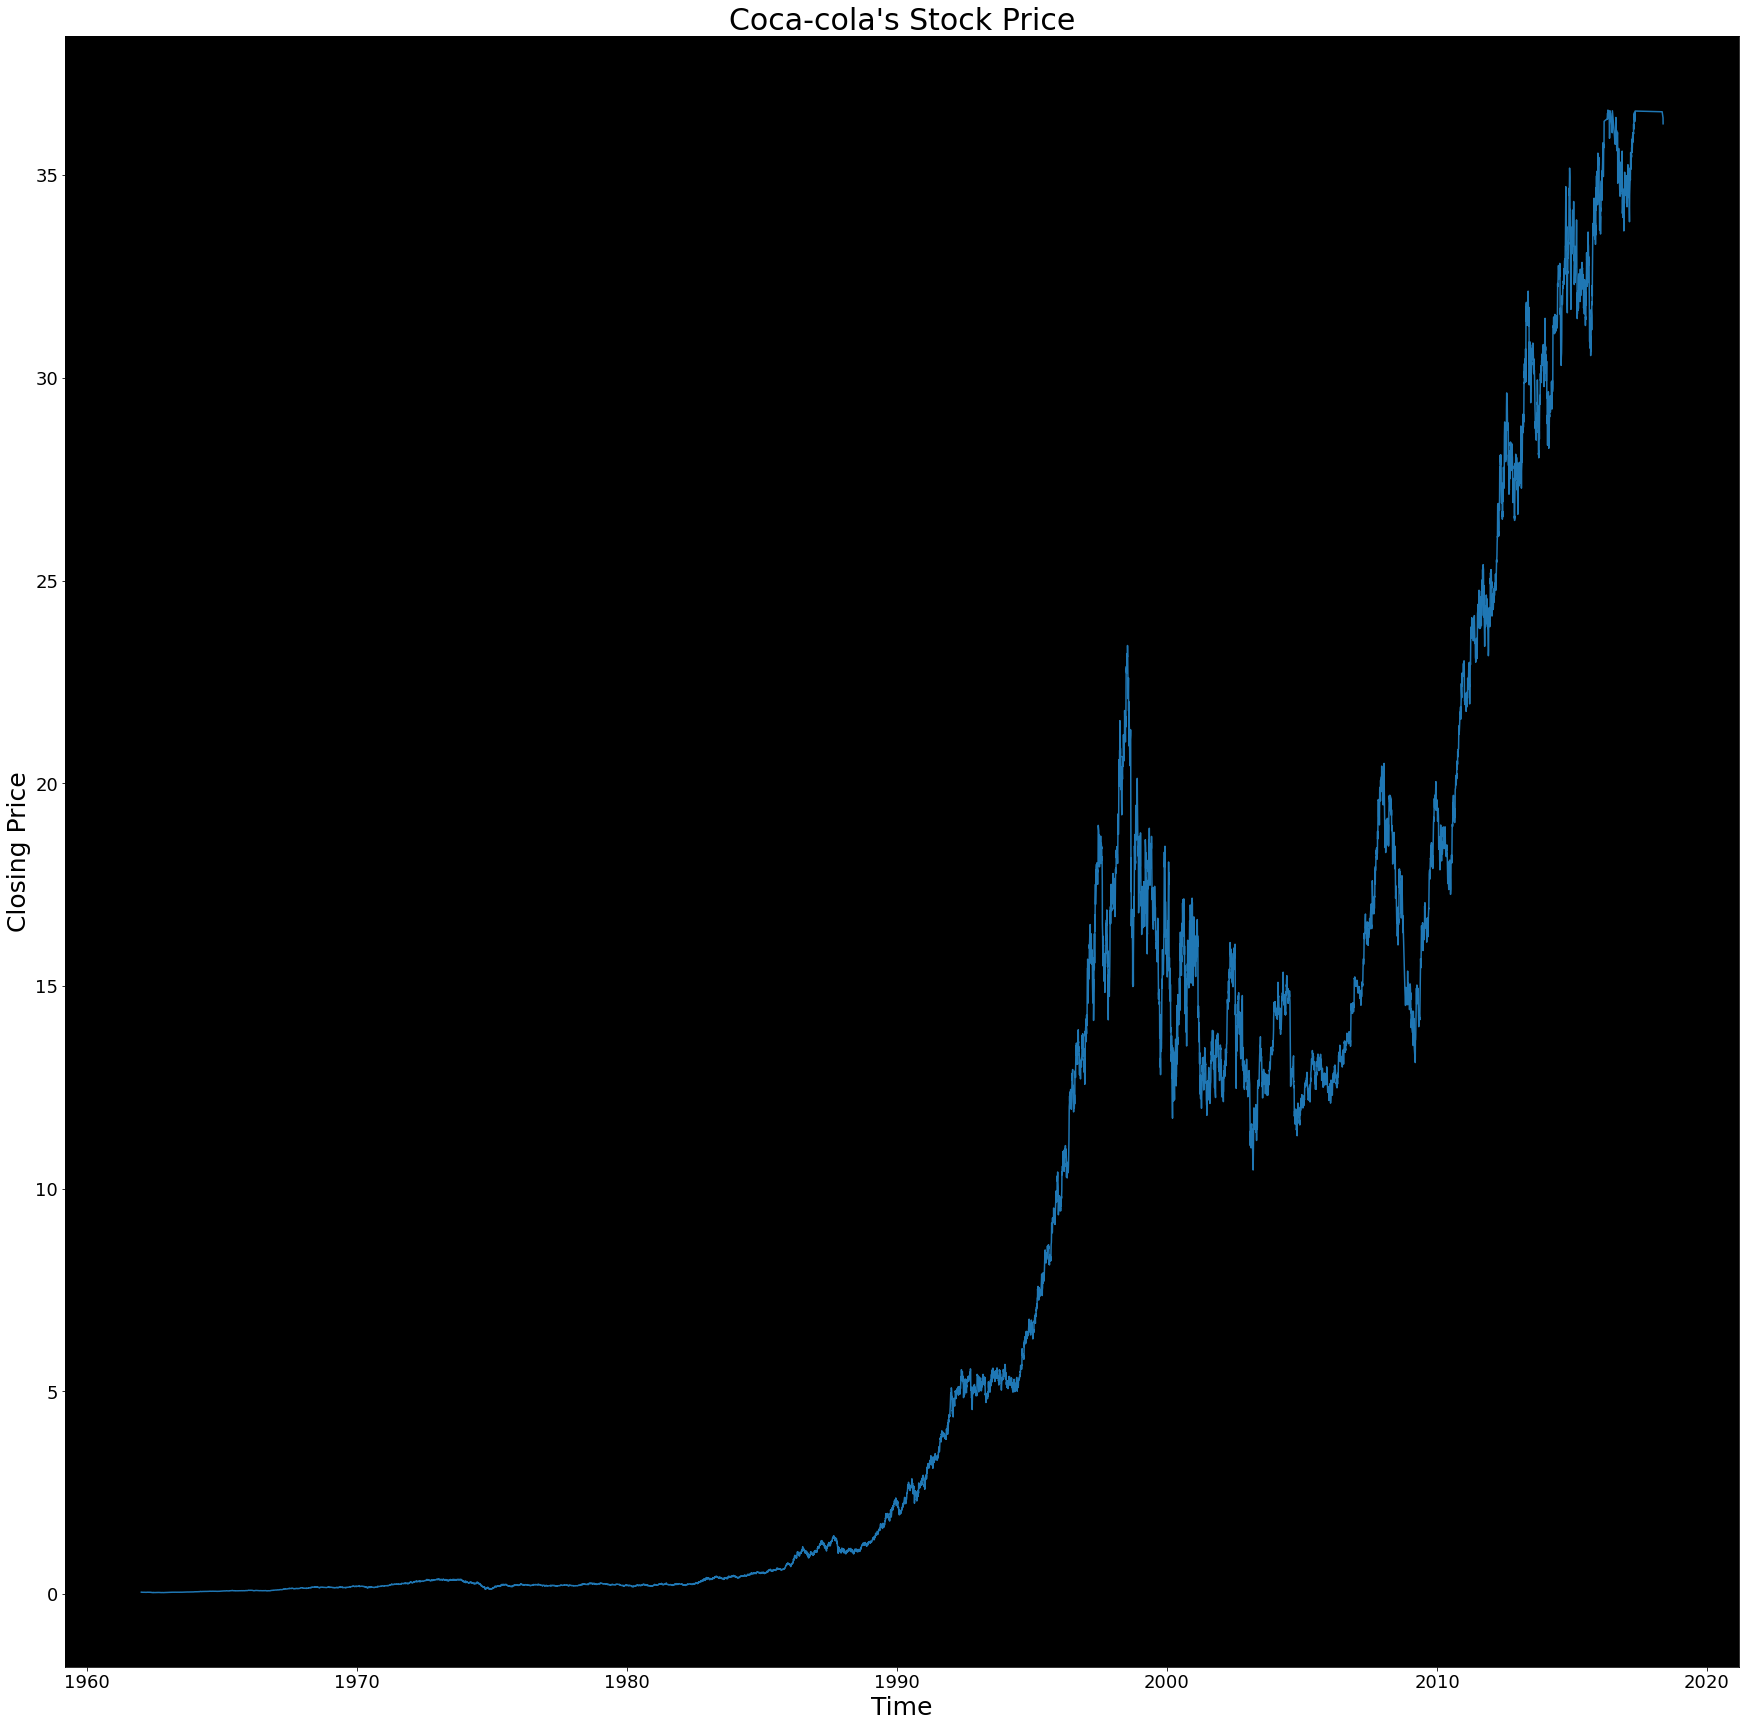

In [170]:
visualize_faang_stock_prices(df)

In [171]:
pip install mplfinance


Note: you may need to restart the kernel to use updated packages.


In [172]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpdates
def visualize_faang_candlestick_charts(df):

    candlestick_chart_data = ['Date', 'Open', 'High', 'Low', 'Close']

    new_df = df[candlestick_chart_data]
    new_df['Date'] = new_df['Date'].map(mpdates.date2num)
    fig, axes = plt.subplots(1, 1, figsize = (30, 30))

    axes.set_facecolor('black')
    date_format = mpdates.DateFormatter('%Y')
    axes.xaxis.set_major_formatter(date_format)
    candlestick_ohlc(axes, new_df.values, colorup = '#0000FF', colordown = '#FFFF00', alpha = 0.8)
    axes.set_title('Candlestick Chart for KO', fontsize = 30)
    axes.set_xlabel('Time', fontsize = 25)
    axes.set_ylabel('Price', fontsize = 25)
    axes.xaxis.set_tick_params(labelsize = 18)
    axes.yaxis.set_tick_params(labelsize = 18)
    
    plt.show()
    


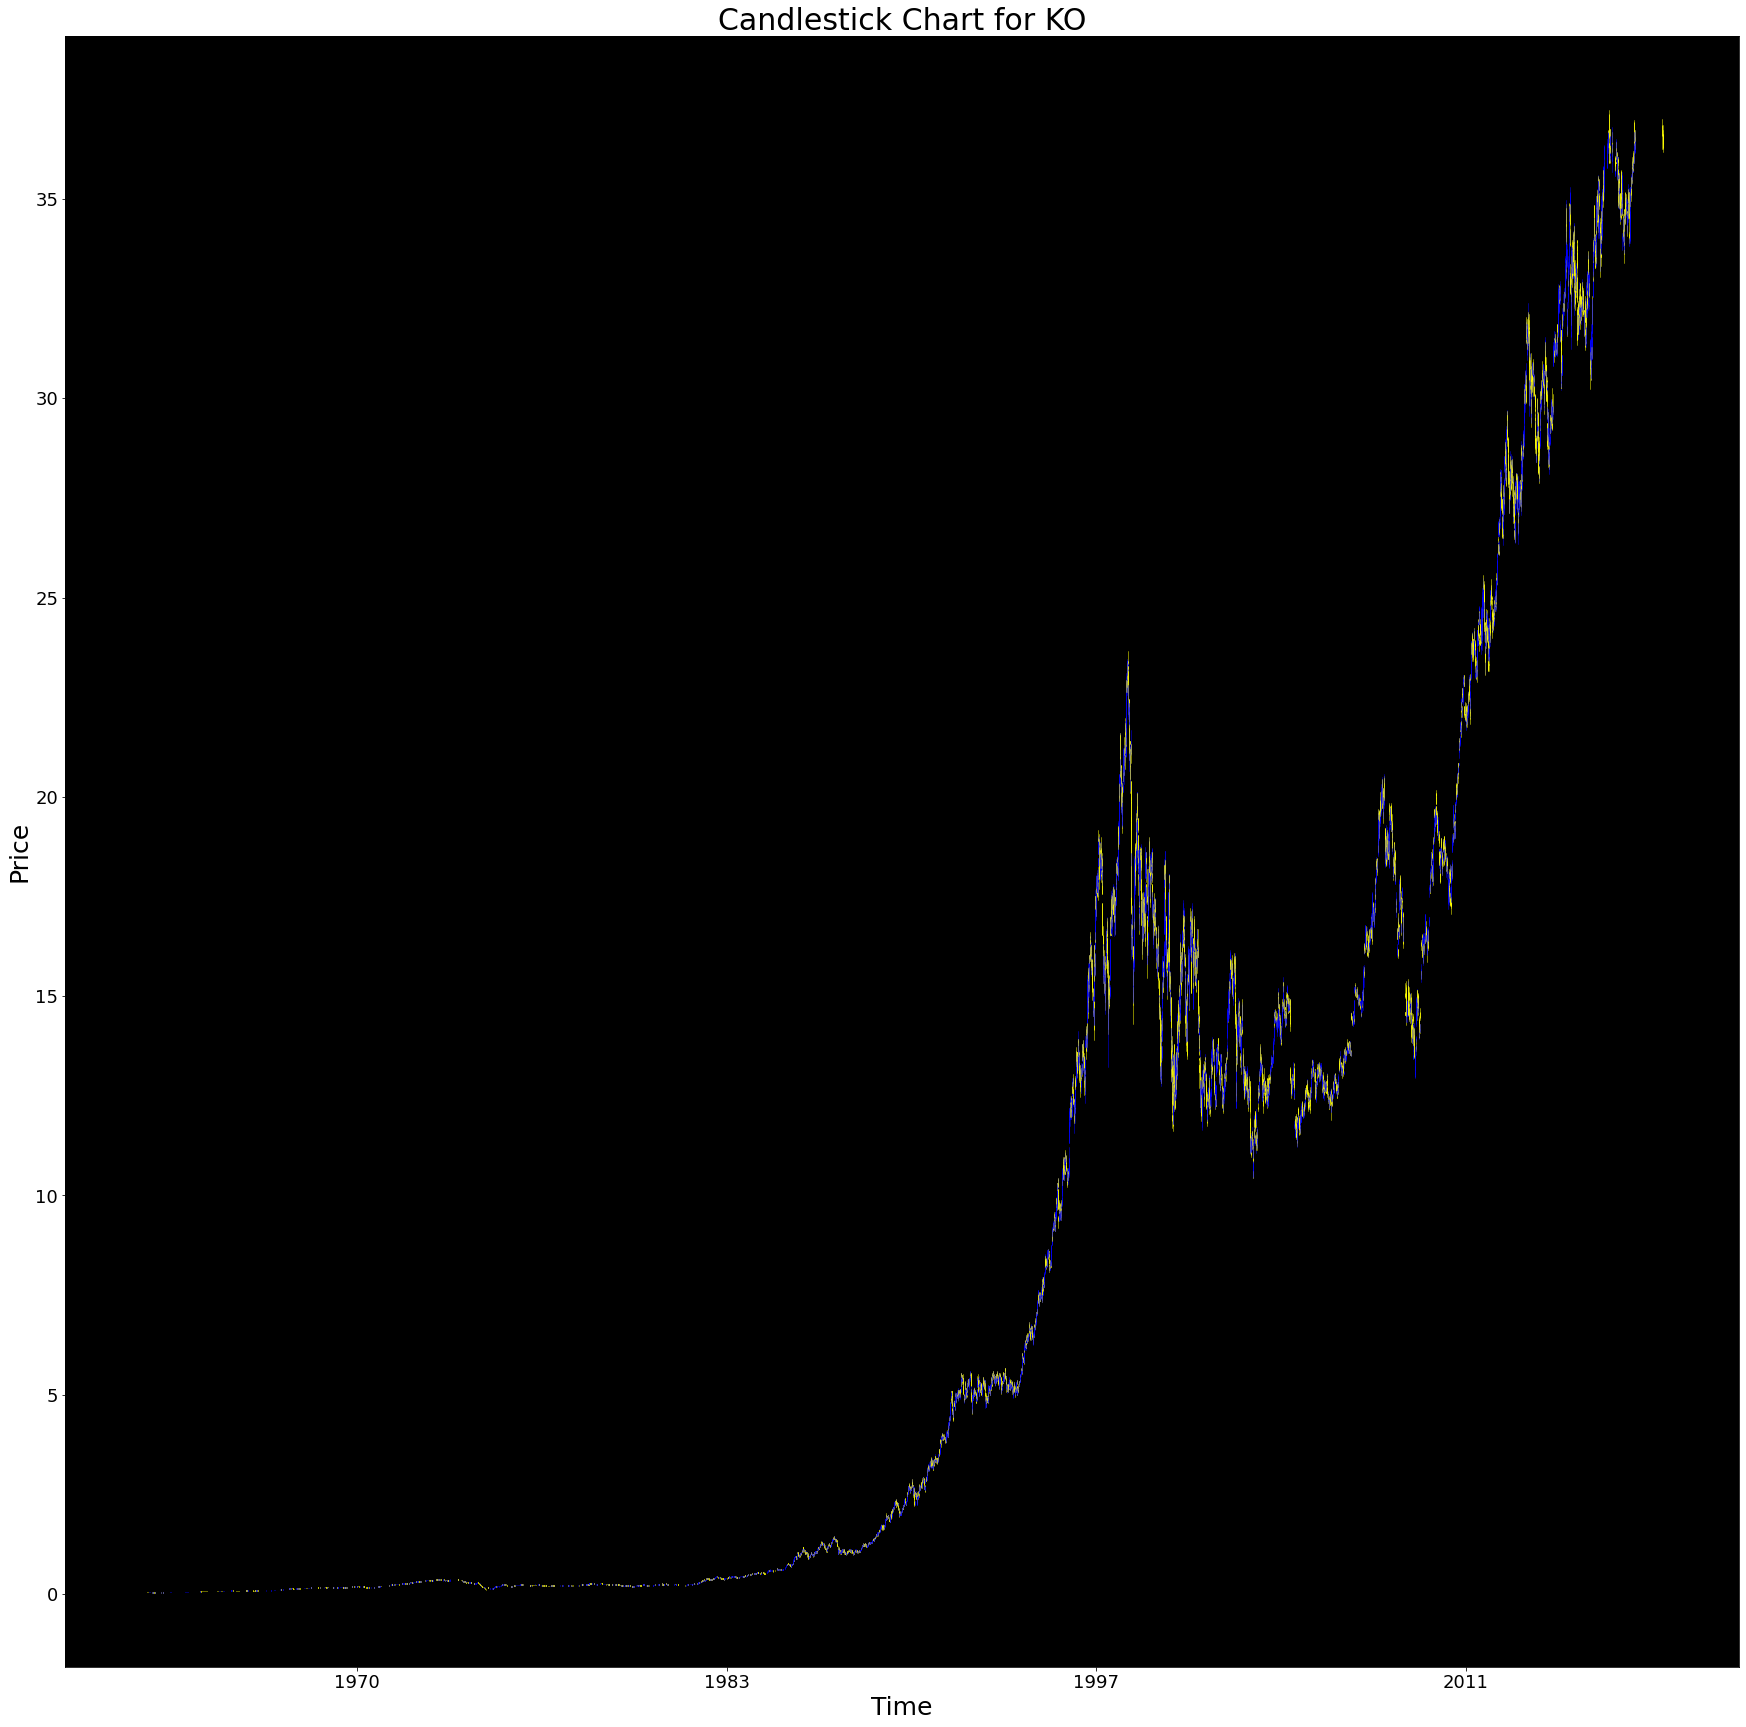

In [173]:
visualize_faang_candlestick_charts(df)

In [174]:
df_norm = (df-df.min())/ (df.max() - df.min())

#view normalized DataFrame
df_norm

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0.000000,0.000349,0.000382,0.000417,0.000358,0.026846,0.0,0.0
1,0.000049,0.000329,0.000325,0.000366,0.000327,0.055105,0.0,0.0
2,0.000097,0.000322,0.000335,0.00039,0.000337,0.028259,0.0,0.0
3,0.000146,0.000329,0.000342,0.000363,0.000307,0.049453,0.0,0.0
4,0.000291,0.000289,0.000285,0.000327,0.000293,0.07206,0.0,0.0
...,...,...,...,...,...,...,...,...
14181,0.999369,0.99236,0.994187,0.99206,0.998896,0.672453,0.0,0.0
14184,0.999611,0.986478,0.986911,0.996125,0.996986,0.551396,0.0,0.0
14185,0.999660,0.986478,0.990197,0.995647,0.99627,0.339196,0.0,0.0
14189,0.999951,0.982008,0.982921,0.990386,0.994838,0.60245,0.0,0.0


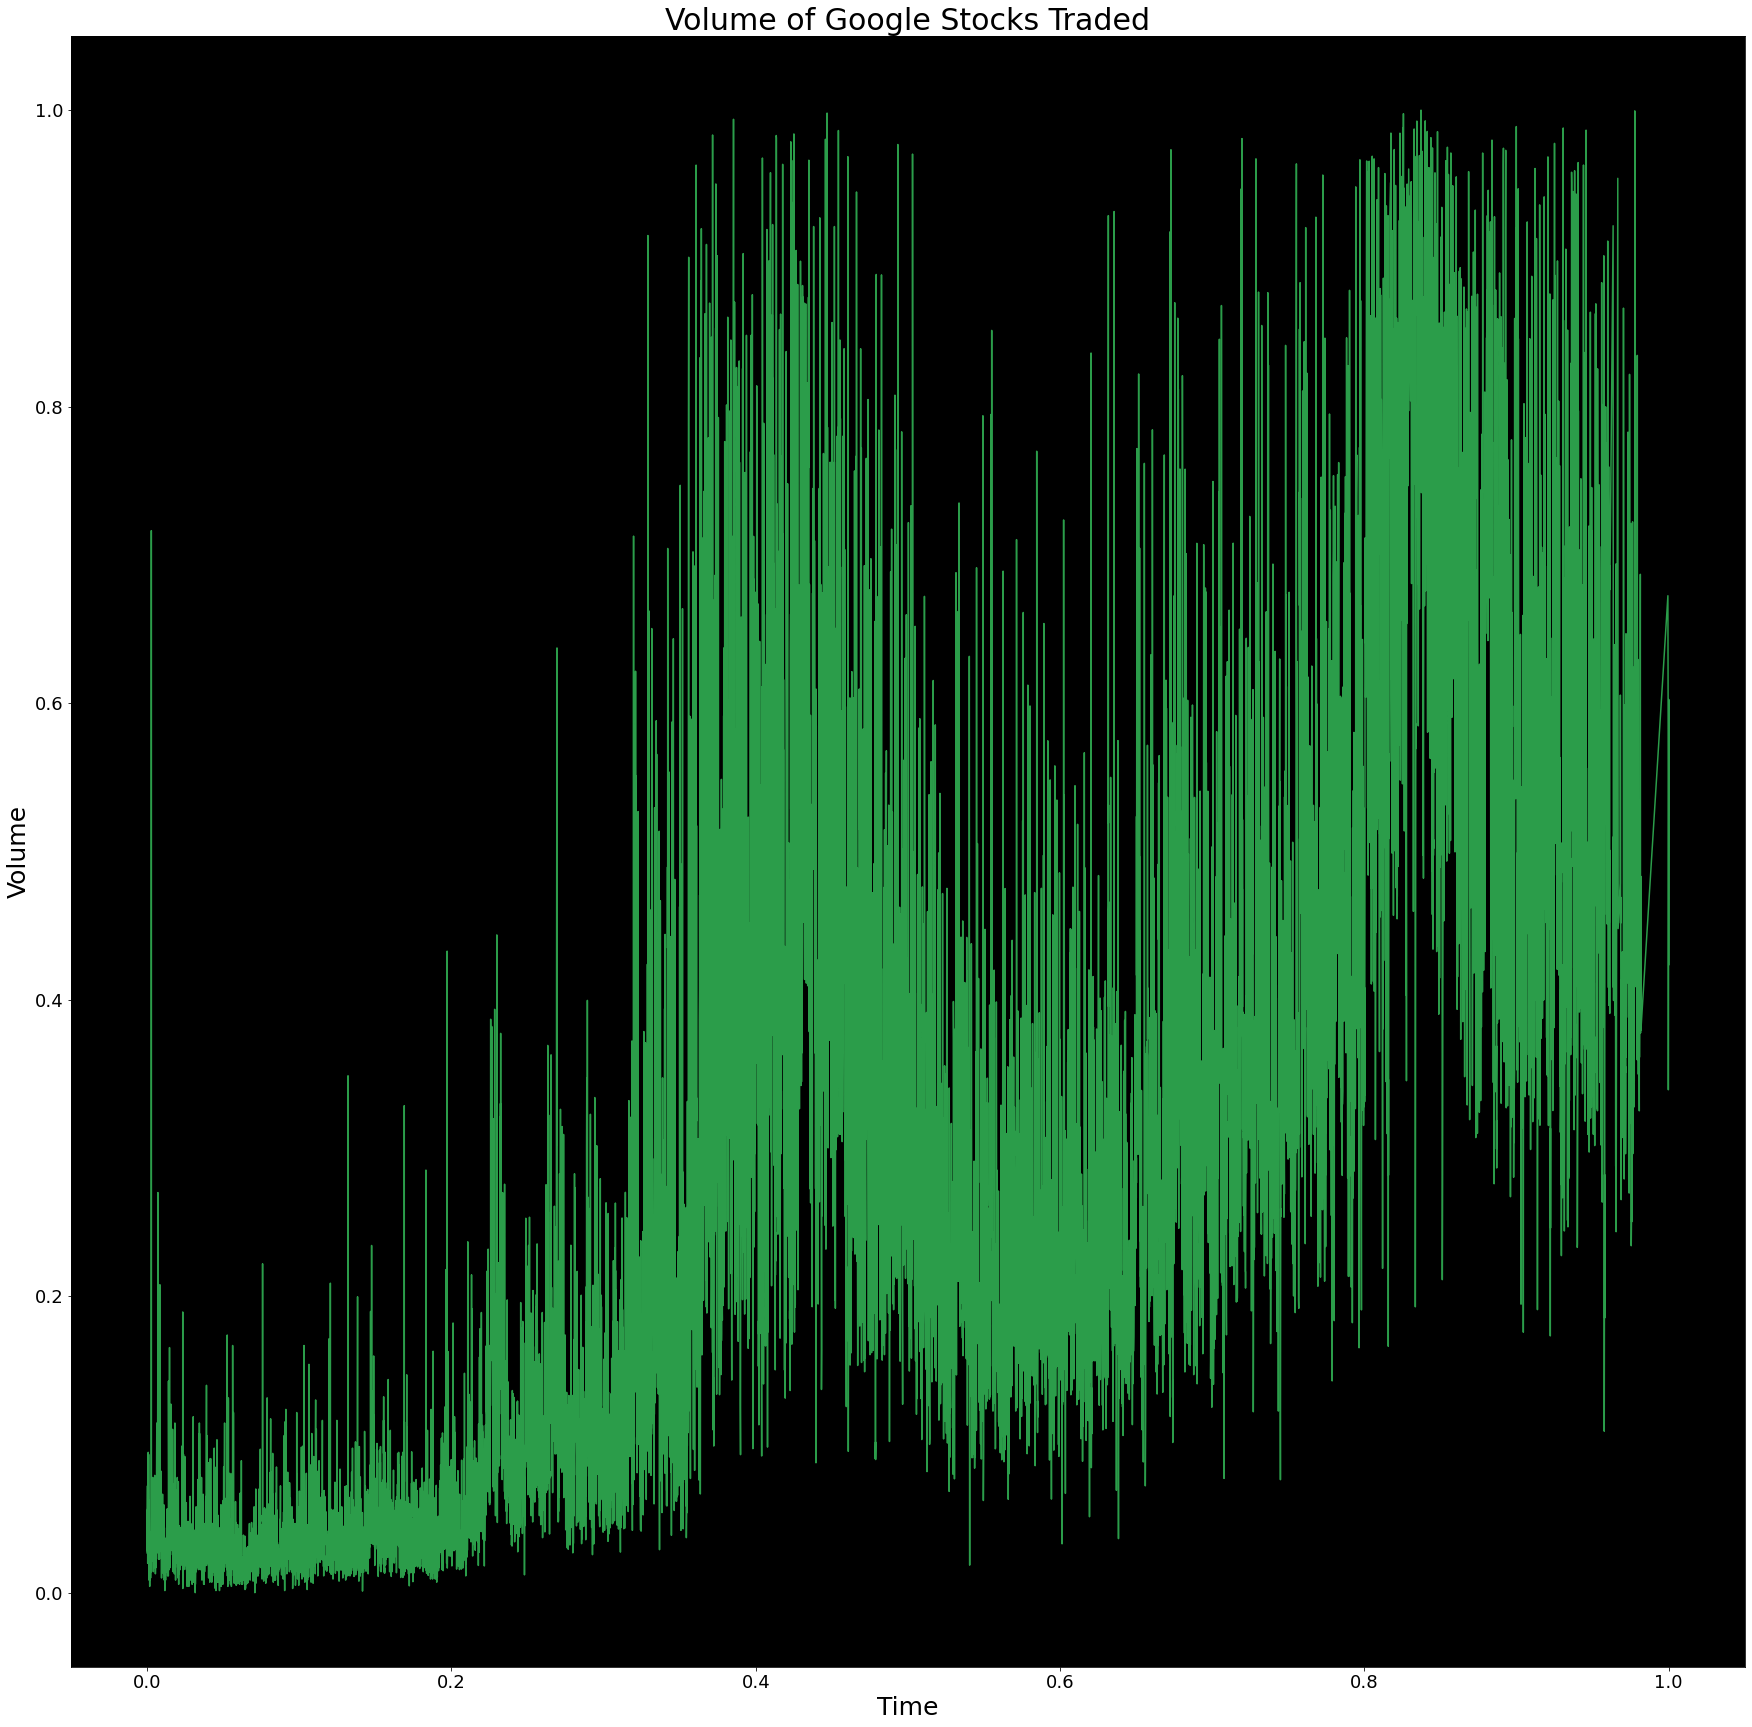

In [175]:
def visualize_faang_stock_volume(df_norm):

    fig, axes = plt.subplots(1, 1, figsize = (30, 30))
  


    axes.set_facecolor('black')
    axes.plot(df_norm['Date'], df_norm['Volume'], color = '#2B9D4A')
    axes.set_title("Volume of Google Stocks Traded", fontsize = 30)
    axes.set_xlabel('Time', fontsize = 25)
    axes.set_ylabel('Volume', fontsize = 25)
    axes.xaxis.set_tick_params(labelsize = 18)
    axes.yaxis.set_tick_params(labelsize = 18)

    plt.show()
    
visualize_faang_stock_volume(df_norm)